<a href="https://colab.research.google.com/github/vikaschaudhary53/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing all the required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Module 1/Python for Data Science/Capstone Project: Global Terrorism Analysis/Global Terrorism Data.csv'

In [ ]:
gt_df = pd.read_csv(file_path, encoding="ISO-8859–1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#Plotting the first five rows
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Plotting the last five rows
gt_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#know the number of rows and columns in the Data Frame.
gt_df.shape

(181691, 135)

In [ ]:
#know the basic information bout the dataframe
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Creating a column dictionary to rename the required columns

column_dict = {'iyear':'Year','country_txt':'Country','provstate':'State','city':'City','region_txt':'Region',
               'attacktype1_txt':'Attack', 'targtype1_txt':'Target', 'gname': 'Group_Name', 'motive':'Motive', 
               'weaptype1_txt':'Weapon', 'nkill':'Death', 'nkillter': 'Perpetrator_Death', 'nwound':'Wounded', 'nwoundte':'Perpetrator_Wounded','propextent_txt':'Property', 'ransomamt':'Ransom_Amt'}

In [ ]:
# Renaming the columns
gt_df.rename(columns = column_dict, inplace = True)

In [ ]:
# Keeping only those columns which are in the dictionary
required_columns = list(column_dict.values())
print(required_columns)

['Year', 'Country', 'State', 'City', 'Region', 'Attack', 'Target', 'Group_Name', 'Motive', 'Weapon', 'Death', 'Perpetrator_Death', 'Wounded', 'Perpetrator_Wounded', 'Property', 'Ransom_Amt']


In [ ]:
# Keeping the required columns
gt_df = gt_df[required_columns]
gt_df.shape

(181691, 16)

### The number of columns have been reduced from 135 to 16.

In [ ]:
# Data Frame after reducing the number of columns
gt_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
0,1970,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,NaN,0.0,NaN,NaN,NaN
1,1970,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,NaN,0.0,NaN,NaN,800000.0
2,1970,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,NaN,0.0,NaN,NaN,NaN
3,1970,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Middle Shebelle,Ceelka Geelow,Sub-Saharan Africa,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,0.0,2.0,0.0,NaN,NaN
181687,2017,Syria,Lattakia,Jableh,Middle East & North Africa,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,0.0,7.0,0.0,Unknown,NaN
181688,2017,Philippines,Maguindanao,Kubentog,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,0.0,0.0,Unknown,NaN
181689,2017,India,Manipur,Imphal,South Asia,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
# Getting basic information about Data Frame after reducing the number of columns
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 181691 non-null  int64  
 1   Country              181691 non-null  object 
 2   State                181270 non-null  object 
 3   City                 181257 non-null  object 
 4   Region               181691 non-null  object 
 5   Attack               181691 non-null  object 
 6   Target               181691 non-null  object 
 7   Group_Name           181691 non-null  object 
 8   Motive               50561 non-null   object 
 9   Weapon               181691 non-null  object 
 10  Death                171378 non-null  float64
 11  Perpetrator_Death    114733 non-null  float64
 12  Wounded              165380 non-null  float64
 13  Perpetrator_Wounded  112548 non-null  float64
 14  Property             64065 non-null   object 
 15  Ransom_Amt       

#### There are 9 columns out of 16 columns with some NaN values.

In [ ]:
# Filling the NaN values of the columns
gt_df['State'].fillna('Unknown', inplace=True)
gt_df['City'].fillna('Unknown', inplace=True)
gt_df['Motive'].fillna('Unknown', inplace=True)
gt_df['Death'].fillna(0, inplace=True)
gt_df['Perpetrator_Death'].fillna(0, inplace=True)
gt_df['Wounded'].fillna(0, inplace=True)
gt_df['Perpetrator_Wounded'].fillna(0, inplace=True)
gt_df['Property'].fillna('Unknown', inplace=True)
gt_df['Ransom_Amt'].fillna(0, inplace=True)

In [ ]:
# Checking if any 'NaN' value now
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 181691 non-null  int64  
 1   Country              181691 non-null  object 
 2   State                181691 non-null  object 
 3   City                 181691 non-null  object 
 4   Region               181691 non-null  object 
 5   Attack               181691 non-null  object 
 6   Target               181691 non-null  object 
 7   Group_Name           181691 non-null  object 
 8   Motive               181691 non-null  object 
 9   Weapon               181691 non-null  object 
 10  Death                181691 non-null  float64
 11  Perpetrator_Death    181691 non-null  float64
 12  Wounded              181691 non-null  float64
 13  Perpetrator_Wounded  181691 non-null  float64
 14  Property             181691 non-null  object 
 15  Ransom_Amt       

## Global

In [ ]:
# Number of attacks over the year
gt_df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [ ]:
# Creating an attack series
gt_df_attacks = gt_df['Year'].value_counts()
gt_df_attacks.sort_index(inplace = True)

In [ ]:
# Creating a dictionary where 'Key' is year and 'Value' is number of attacks
gt_df_attacks_dict = gt_df_attacks.to_dict()
print(gt_df_attacks_dict)

{1970: 651, 1971: 471, 1972: 568, 1973: 473, 1974: 581, 1975: 740, 1976: 923, 1977: 1319, 1978: 1526, 1979: 2662, 1980: 2662, 1981: 2586, 1982: 2544, 1983: 2870, 1984: 3495, 1985: 2915, 1986: 2860, 1987: 3183, 1988: 3721, 1989: 4324, 1990: 3887, 1991: 4683, 1992: 5071, 1994: 3456, 1995: 3081, 1996: 3058, 1997: 3197, 1998: 934, 1999: 1395, 2000: 1814, 2001: 1906, 2002: 1333, 2003: 1278, 2004: 1166, 2005: 2017, 2006: 2758, 2007: 3242, 2008: 4805, 2009: 4721, 2010: 4826, 2011: 5076, 2012: 8522, 2013: 12036, 2014: 16903, 2015: 14965, 2016: 13587, 2017: 10900}


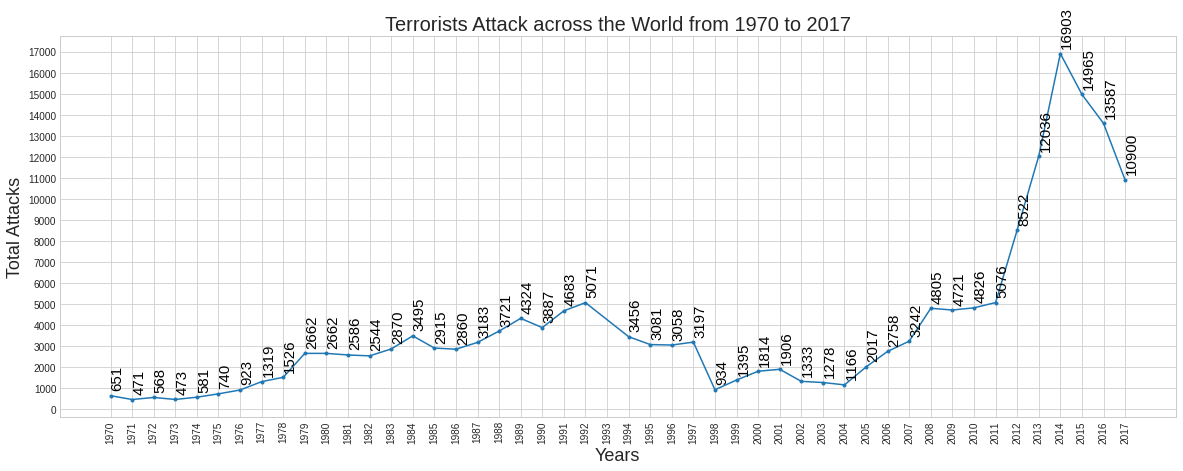

In [ ]:
# plotting a line graph to show the total rise of terrorism from 1970 to 2017

plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
plt.title("Terrorists Attack across the World from 1970 to 2017", fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,20000,1000))
plt.plot(gt_df_attacks,marker='.')

#Below is the code for representing number of attacks every year by showing it over the line
for k, v in gt_df_attacks_dict.items():
  plt.annotate(v, (k,v+400), size=15, rotation=90, color='Black')

In [ ]:
# Region wise total number of attacks.
gt_df_region_attack = gt_df['Region'].value_counts()
gt_df_region_attack.sort_index(inplace = True)
gt_df_region_attack

Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Region, dtype: int64

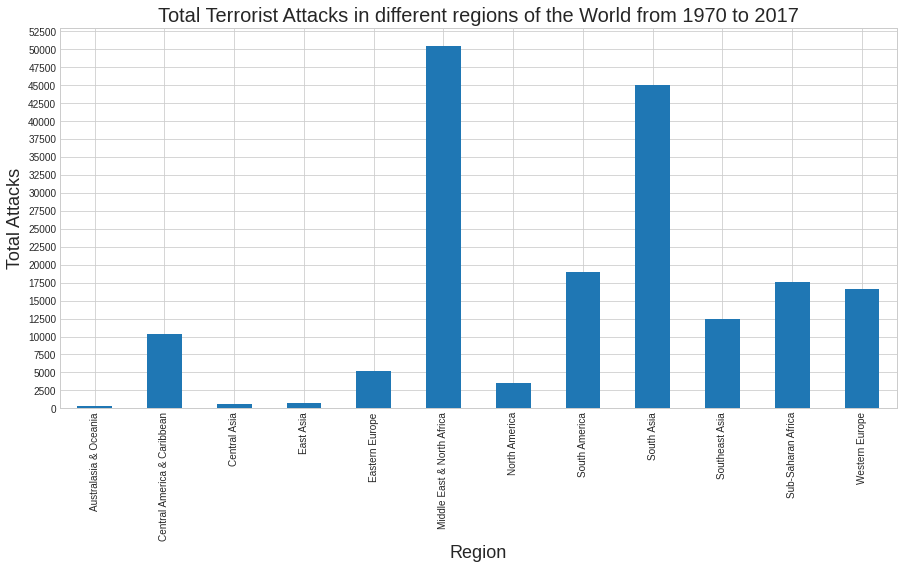

In [ ]:
#Plotting a bar graph to show the total attacks in different regions of the world over the years
plt.figure(figsize=(15,7))
plt.title("Total Terrorist Attacks in different regions of the World from 1970 to 2017", fontsize=20)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.yticks(np.arange(0,70000,2500))
gt_df_region_attack.plot(kind='bar')
plt.show()

#### Getting a table to show region wise data for the number of attacks, total death, perpeterators death, total wounded and perpeterators wounded.

In [ ]:
# Columns in 'Global Data Frame'
gt_df.columns

Index(['Year', 'Country', 'State', 'City', 'Region', 'Attack', 'Target',
       'Group_Name', 'Motive', 'Weapon', 'Death', 'Perpetrator_Death',
       'Wounded', 'Perpetrator_Wounded', 'Property', 'Ransom_Amt'],
      dtype='object')

In [ ]:
# Using 'groupby' to create the required Data Frame
gt_df_regions_casualties = gt_df.groupby('Region')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# Getting different array of 'gt_df_regions_casualties' dataframe
gt_df_regions_casualties_array = gt_df_regions_casualties.values
gt_df_regions_casualties_array

array([[1.50000e+02, 1.30000e+01, 2.60000e+02, 7.00000e+00],
       [2.87080e+04, 2.46000e+02, 8.99100e+03, 2.10000e+01],
       [1.00000e+03, 5.50000e+01, 2.00900e+03, 9.00000e+00],
       [1.15200e+03, 2.52000e+02, 9.21300e+03, 3.40000e+01],
       [7.41500e+03, 1.26800e+03, 1.20450e+04, 4.74000e+02],
       [1.37642e+05, 1.97880e+04, 2.14308e+05, 2.02000e+03],
       [4.91600e+03, 8.50000e+01, 2.15310e+04, 3.70000e+01],
       [2.88490e+04, 7.89000e+02, 1.67040e+04, 6.90000e+01],
       [1.01319e+05, 2.13420e+04, 1.41360e+05, 8.16100e+03],
       [1.56370e+04, 1.23300e+03, 2.62590e+04, 4.30000e+02],
       [7.83860e+04, 1.29700e+04, 5.28570e+04, 7.36000e+02],
       [6.69400e+03, 2.50000e+02, 1.83320e+04, 6.30000e+01]])

In [ ]:
#Combining the above array {"gt_df_regions_casualties"} with 'gt_df_region_attack' array
gt_df_region_attack_array = np.insert(gt_df_regions_casualties_array, 0, gt_df_region_attack, axis = 1)
gt_df_region_attack_array

array([[2.82000e+02, 1.50000e+02, 1.30000e+01, 2.60000e+02, 7.00000e+00],
       [1.03440e+04, 2.87080e+04, 2.46000e+02, 8.99100e+03, 2.10000e+01],
       [5.63000e+02, 1.00000e+03, 5.50000e+01, 2.00900e+03, 9.00000e+00],
       [8.02000e+02, 1.15200e+03, 2.52000e+02, 9.21300e+03, 3.40000e+01],
       [5.14400e+03, 7.41500e+03, 1.26800e+03, 1.20450e+04, 4.74000e+02],
       [5.04740e+04, 1.37642e+05, 1.97880e+04, 2.14308e+05, 2.02000e+03],
       [3.45600e+03, 4.91600e+03, 8.50000e+01, 2.15310e+04, 3.70000e+01],
       [1.89780e+04, 2.88490e+04, 7.89000e+02, 1.67040e+04, 6.90000e+01],
       [4.49740e+04, 1.01319e+05, 2.13420e+04, 1.41360e+05, 8.16100e+03],
       [1.24850e+04, 1.56370e+04, 1.23300e+03, 2.62590e+04, 4.30000e+02],
       [1.75500e+04, 7.83860e+04, 1.29700e+04, 5.28570e+04, 7.36000e+02],
       [1.66390e+04, 6.69400e+03, 2.50000e+02, 1.83320e+04, 6.30000e+01]])

In [ ]:
# Getting the list of 'Regions'
region_list = gt_df['Region'].unique()
region_list.sort()
print(region_list)

['Australasia & Oceania' 'Central America & Caribbean' 'Central Asia'
 'East Asia' 'Eastern Europe' 'Middle East & North Africa' 'North America'
 'South America' 'South Asia' 'Southeast Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [ ]:
# Creating a list of Columns
region_column_name = ['Attacks', 'Deaths', 'Perpetrator_Death',	'Wounded',	'Perpetrator_Wounded']

In [ ]:
#Creating a 'DataFrame' to give complete data about the attacks and their consequence is terms of deaths and injuries.
region_attack_df = pd.DataFrame(data=gt_df_region_attack_array, index=region_list, columns=region_column_name).astype(int)
region_attack_df.loc['Total'] = region_attack_df.sum(numeric_only=True, axis=0)
region_attack_df

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Australasia & Oceania,282,150,13,260,7
Central America & Caribbean,10344,28708,246,8991,21
Central Asia,563,1000,55,2009,9
East Asia,802,1152,252,9213,34
Eastern Europe,5144,7415,1268,12045,474
Middle East & North Africa,50474,137642,19788,214308,2020
North America,3456,4916,85,21531,37
South America,18978,28849,789,16704,69
South Asia,44974,101319,21342,141360,8161
Southeast Asia,12485,15637,1233,26259,430


#### Plotting a line graph for 3-most violent regions i.e. "Middle East & North Africa", "South Asia" and "South America".

In [ ]:
#For Middle East & North Africa	
midEast_and_northAfrica_df = gt_df.loc[gt_df['Region']=='Middle East & North Africa']
midEast_and_northAfrica_attacks = midEast_and_northAfrica_df['Year'].value_counts()
midEast_and_northAfrica_attacks.sort_index(inplace=True)

In [ ]:
#For South Asia
southAsia_df = gt_df.loc[gt_df['Region']=='South Asia']
southAsia_attacks = southAsia_df['Year'].value_counts()
southAsia_attacks.sort_index(inplace=True)

In [ ]:
#For South America
south_America_df = gt_df.loc[gt_df['Region']=='South America']
south_America_attacks = south_America_df['Year'].value_counts()
south_America_attacks.sort_index(inplace=True)

In [ ]:
# Giving the names to columns for attacks
midEast_and_northAfrica_attacks = midEast_and_northAfrica_attacks.rename(index='Middle_East_and_North_Africa_Attacks')
southAsia_attacks = southAsia_attacks.rename(index='South_Asia_Attacks')
south_America_attacks = south_America_attacks.rename(index='South_America_Attacks')

#Combining all three into one Data Frame
three_violent_regions = pd.concat([midEast_and_northAfrica_attacks, southAsia_attacks, south_America_attacks], axis=1)

#Filling the NaN values
three_violent_regions.fillna(0, inplace=True)

#Changing the datatype to "int"
three_violent_regions = three_violent_regions.astype(int)

In [ ]:
three_violent_regions

,Middle_East_and_North_Africa_Attacks,South_Asia_Attacks,South_America_Attacks
1970,28,1,65
1971,55,0,24
1972,53,1,33
1973,19,1,83
1974,42,2,81
1975,44,4,55
1976,55,4,91
1977,211,2,119
1978,128,2,222
1979,455,34,236


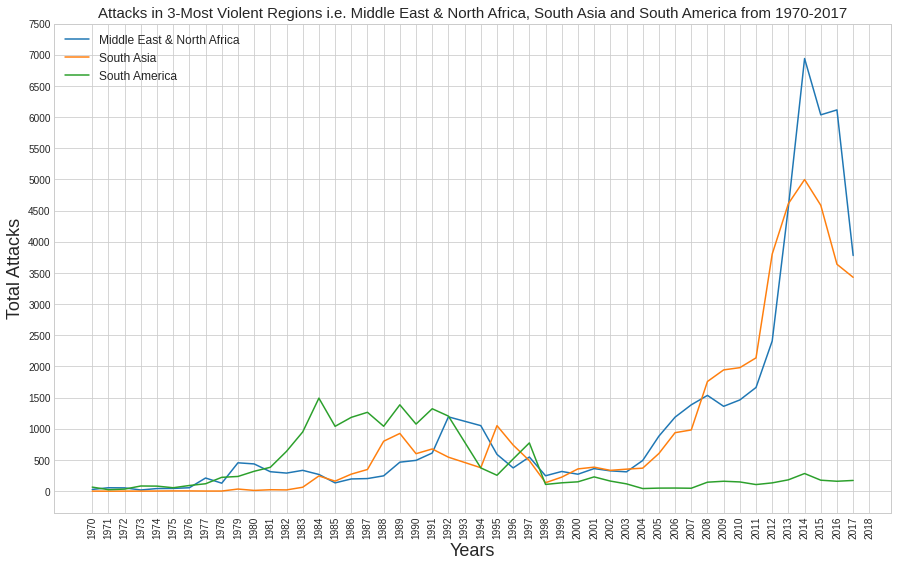

In [ ]:
# Plotting a graph to compare 3-most violent regions using "three_violent_regions" DataFrame
plt.figure(figsize=(15,9))
plt.plot(three_violent_regions)
plt.legend(['Middle East & North Africa','South Asia','South America'], fontsize=12)
plt.title("Attacks in 3-Most Violent Regions i.e. Middle East & North Africa, South Asia and South America from 1970-2017", fontsize=15)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,8000,500))

plt.xticks(rotation=90)
plt.show()

### Ploting a "Stack Plot" for 3-most violent regions

In [ ]:
# Getting all the required lists
three_violent_regions_list = list(three_violent_regions.index)
Middle_East_and_North_Africa_Attacks_list = list(three_violent_regions['Middle_East_and_North_Africa_Attacks'])
South_Asia_Attacks_list	= list(three_violent_regions['South_Asia_Attacks'])	
South_America_Attacks_list = list(three_violent_regions['South_America_Attacks'])	

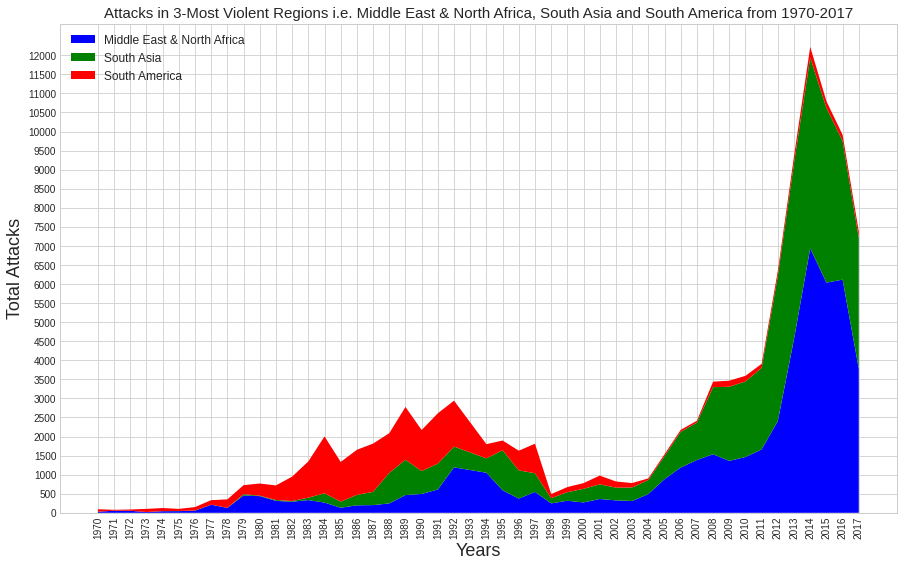

In [ ]:
# Stack plot
plt.figure(figsize=(15,9))
labels = ['Middle East & North Africa','South Asia','South America']
colors = ['b','g','r']
plt.stackplot(three_violent_regions_list, Middle_East_and_North_Africa_Attacks_list, South_Asia_Attacks_list, South_America_Attacks_list, labels=labels, colors=colors)
plt.legend(loc='upper left', fontsize=12)
plt.title("Attacks in 3-Most Violent Regions i.e. Middle East & North Africa, South Asia and South America from 1970-2017", fontsize=15)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,12500,500))

plt.xticks(rotation=90)
plt.show()

#### 10-Most Violent Organizations in the World (Unknown + other 9)

In [ ]:
# Knowing the total number of violent Organization in the world given in the database
violent_org_world = len(list(gt_df['Group_Name'].value_counts()))
print(f'As per the dataset there are {violent_org_world} in the world that are persuing their goals with the means of violence.')

As per the dataset there are 3537 in the world that are persuing their goals with the means of violence.


In [ ]:
# Getting a series or Organization and total number of attacks carried out by them
attacks_by_org_Inworld = gt_df.groupby('Group_Name')['Year'].count()
attacks_by_org_Inworld

Group_Name
1 May                                    10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zulu Miners                               1
Zuwar al-Imam Rida                        1
Zviadists                                 1
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
Name: Year, Length: 3537, dtype: int64

In [ ]:
#Getting a DataFrame of violent organistion with 'Death', 'Perpetrator_Death', 'Wounded' and 'Perpetrator_Wounded'
org_involved_world_df = gt_df.groupby('Group_Name')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum().astype(int)
org_involved_world_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Group_Name,,,,
1 May,2,0,0,0
14 K Triad,0,0,0,0
14 March Coalition,5,0,80,0
14th of December Command,0,0,0,0
15th of September Liberation Legion,0,0,1,1
...,...,...,...,...
Zulu Miners,1,0,10,0
Zuwar al-Imam Rida,0,0,0,0
Zviadists,0,0,0,0


#### Mergin the "attacks_by_org_Inworld" series with "org_involved_world_df" to get the complete picture.

In [ ]:
org_involved_world_array = org_involved_world_df.values
org_involved_world_array

array([[ 2,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 5,  0, 80,  0],
       ...,
       [ 0,  0,  0,  0],
       [ 5,  5,  0,  0],
       [ 0,  0,  0,  0]])

In [ ]:
org_involved_array = np.insert(org_involved_world_array, 0, attacks_by_org_Inworld, axis=1)
org_involved_array

array([[10,  2,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 1,  5,  0, 80,  0],
       ...,
       [ 1,  0,  0,  0,  0],
       [ 1,  5,  5,  0,  0],
       [ 1,  0,  0,  0,  0]])

In [ ]:
org_world_list = gt_df['Group_Name'].unique()
org_world_list.sort()
print(len(org_world_list))

3537


In [ ]:
org_world_columnName = ['Attacks', 'Deaths', 'Perpetrator_Death',	'Wounded',	'Perpetrator_Wounded']

In [ ]:
#Creating a 'DataFrame' to give complete data about the attacks and their consequence is terms of deaths and injuries. 
org_world_stat_df = pd.DataFrame(data=org_involved_array, index=org_world_list, columns=org_world_columnName)
org_world_stat_df.sort_values(by='Attacks', ascending=False, inplace=True)
org_world_stat_df.head(10)

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Unknown,82782,112367,7320,210339,1218
Taliban,7478,29410,13254,27932,6534
Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
Shining Path (SL),4555,11601,128,3031,4
Farabundo Marti National Liberation Front (FMLN),3351,8065,84,4065,1
Al-Shabaab,3288,9330,2445,7624,250
New People's Army (NPA),2772,4386,382,3333,115
Irish Republican Army (IRA),2671,1804,72,3658,7
Revolutionary Armed Forces of Colombia (FARC),2487,5661,275,4354,25
Boko Haram,2418,20328,6202,9473,100


In [ ]:
# Converting index into a column with name "Group_Name" and creating a proper dataframe for Organizations and information associated for attacks and consequences of these Organizations
org_df = org_world_stat_df.reset_index()
org_df.rename(columns = {"index":"Group_Name"}, inplace=True)
org_df.columns

Index(['Group_Name', 'Attacks', 'Deaths', 'Perpetrator_Death', 'Wounded',
       'Perpetrator_Wounded'],
      dtype='object')

In [ ]:
#Plotting the created Data Frame
org_df

,Group_Name,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
0,Unknown,82782,112367,7320,210339,1218
1,Taliban,7478,29410,13254,27932,6534
2,Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
3,Shining Path (SL),4555,11601,128,3031,4
4,Farabundo Marti National Liberation Front (FMLN),3351,8065,84,4065,1
...,...,...,...,...,...,...
3532,Jaish al-Muhajireen wal-Ansar (Muhajireen Army),1,1,0,0,0
3533,Jaish al-Islam (Libya),1,0,0,0,0
3534,Jaish Tahkim al-Din,1,3,1,2,0
3535,Jaish Al-Umma (Army of the Nation),1,0,0,0,0


In [ ]:
# Getting the required variables for plotting the graph to show Organization that carried out the highest number of attakcs.
orgName_attack = org_df['Group_Name'].head(10)
orgAttacks = org_df['Attacks'].head(10)

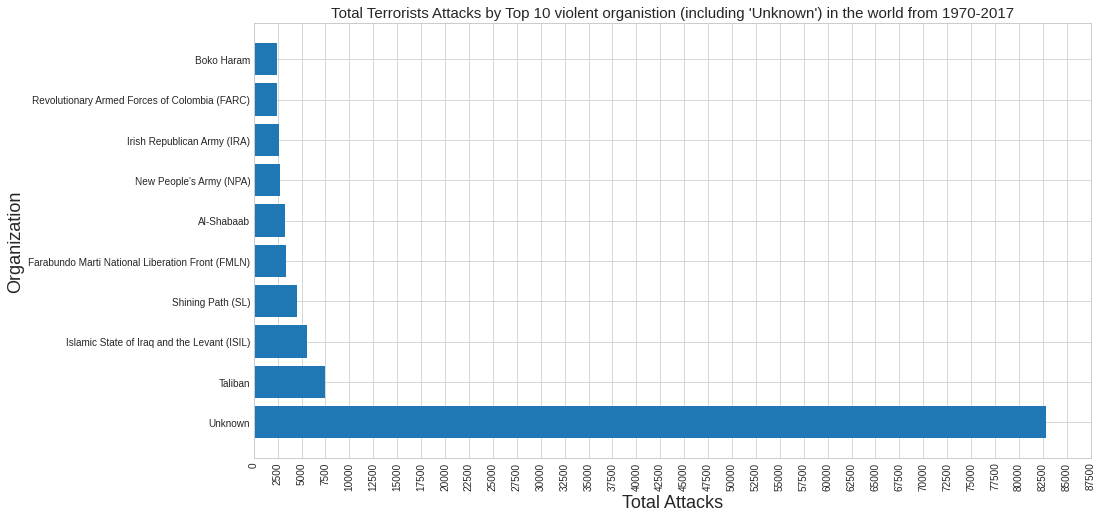

In [ ]:
#Plotting a horizontal bar graph to show to 10 Organization with highest number of attacks carried out by them (including "unknown")
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(orgName_attack,orgAttacks)
plt.title("Total Terrorists Attacks by Top 10 violent organistion (including 'Unknown') in the world from 1970-2017",fontsize=15)
plt.ylabel('Organization',fontsize=18)
plt.xlabel('Total Attacks',fontsize=18)
plt.xticks(np.arange(0,90000,2500))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Creating a new DataFrame by sorting the 'org_df' on the basis of the number 'Deaths'
org_df_2 = org_df.sort_values(by='Deaths', ascending=False)
org_df_2

,Group_Name,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
0,Unknown,82782,112367,7320,210339,1218
2,Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
1,Taliban,7478,29410,13254,27932,6534
9,Boko Haram,2418,20328,6202,9473,100
3,Shining Path (SL),4555,11601,128,3031,4
...,...,...,...,...,...,...
2016,Somali Salvation Democratic Front (SSDF),1,0,0,0,0
2015,Somoza Sympathizers,1,0,0,0,0
2013,Students U of PNG,1,0,0,0,0
2011,Students For Insurrection,1,0,0,0,0


In [ ]:
#Getting a variables for Death
orgName_deaths = org_df_2['Group_Name'].head(10)
orgDeaths = org_df_2['Deaths'].head(10)

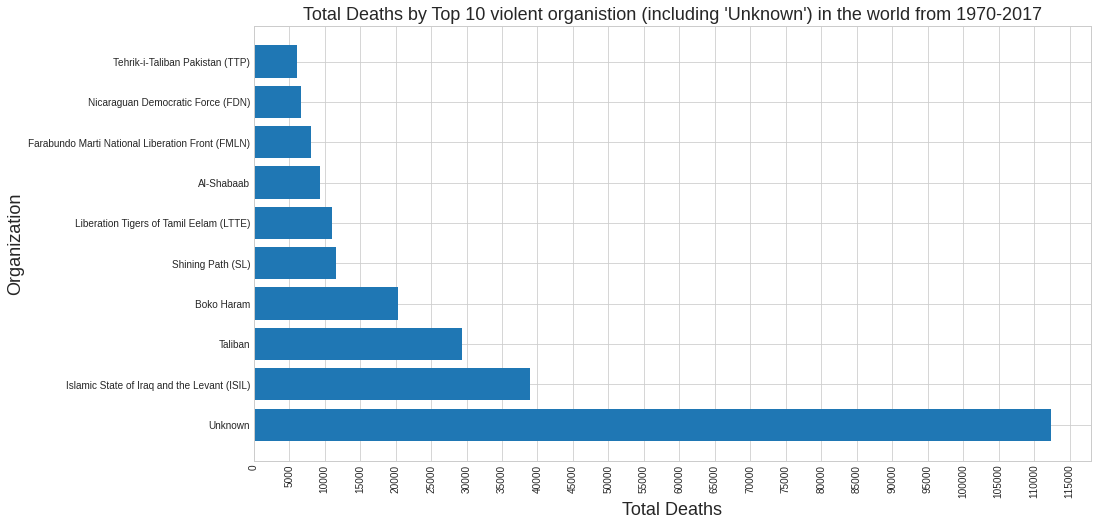

In [ ]:
# Plotting a Horizontal bar graph to know the number of death by top 10 violent organistion (including 'Unknown') in the world from 1970-2017
fig, dx = plt.subplots(figsize=(15,8))
dx.barh(orgName_deaths,orgDeaths)
plt.title("Total Deaths by Top 10 violent organistion (including 'Unknown') in the world from 1970-2017",fontsize=18)
plt.ylabel('Organization',fontsize=18)
plt.xlabel('Total Deaths',fontsize=18)
plt.xticks(np.arange(0,120000,5000))
plt.xticks(rotation=90)
plt.show()

### Based on the above Two Charts we can conclude that some Organizations have more Attack to Death Ratio

In [ ]:
# Creating a series for 'Weapon' used for attacks
weapon_used_global = gt_df['Weapon'].value_counts()
weapon_used_global

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [ ]:
# Getting what percentage of attacks are carried out by different weapons
weapon_used_global.apply(lambda x: (x*100/sum(weapon_used_global)))

Explosives                                                                     50.869883
Firearms                                                                       32.210731
Unknown                                                                         8.342185
Incendiary                                                                      6.128537
Melee                                                                           2.011657
Chemical                                                                        0.176674
Sabotage Equipment                                                              0.077604
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.074852
Other                                                                           0.062744
Biological                                                                      0.019263
Fake Weapons                                                                    0.018163
Radiological         

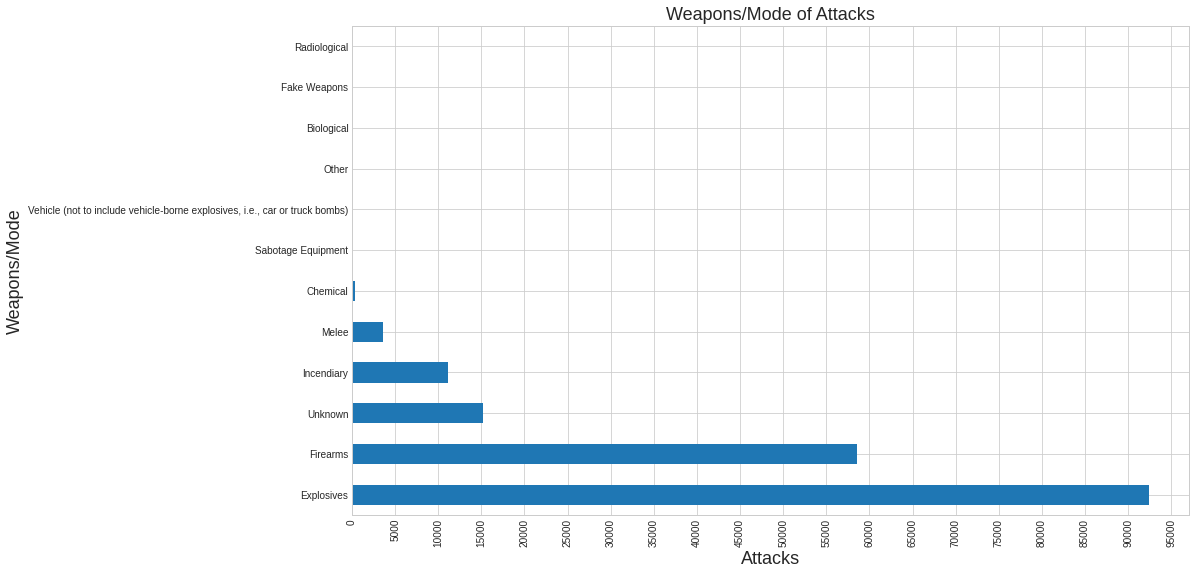

In [ ]:
# Plotting a horizontal bar graph to show the weapons and the total number of times they were used for attacks
plt.figure(figsize=(15,9))
weapon_used_global.plot(kind='barh')
plt.title("Weapons/Mode of Attacks", fontsize=18)
plt.ylabel('Weapons/Mode',fontsize=18)
plt.xlabel('Attacks',fontsize=18)
plt.xticks(np.arange(0,100000,5000))
plt.xticks(rotation=90)
plt.show()

#### Know the total number of times a ransome was paid and find out the percentage of attacks associated with ransom.

In [ ]:
#Know how many times some ransom has been paid
ransom_paid = gt_df['Ransom_Amt']>0
ransom_paid.value_counts()

False    180932
True        759
Name: Ransom_Amt, dtype: int64

In [ ]:
print(f'Out of {len(ransom_paid)} attacks there are only {ransom_paid.value_counts()[1]} times when any ransom amount has been paid. The terrorist attacks involved any ransom is only {ransom_paid.value_counts()[1]*100/len(ransom_paid)} percent of total attacks. ')

Out of 181691 attacks there are only 759 times when any ransom amount has been paid. The terrorist attacks involved any ransom is only 0.41774221067636813 percent of total attacks. 


#### Who are the targets?

In [ ]:
#creating a series to know the targets of the terrorist acts
attackTarget_global = gt_df['Target'].value_counts()
attackTarget_global

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target, dtype: int64

In [ ]:
# Creating a Series to show the targets of attacks with the percentage of total attacks
attackTarget_global_percentage = attackTarget_global.apply(lambda x: (x*100/sum(attackTarget_global)))
attackTarget_global_percentage

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Government (Diplomatic)            1.966526
Terrorists/Non-State Militia       1.672620
Journalists & Media                1.622535
Violent Political Party            1.027018
Airports & Aircraft                0.739167
Telecommunication                  0.555338
NGO                                0.533873
Tourists                           0.242169
Maritime                           0.193185
Food or Water Supply               0.174472
Abortion Related                   0.144751
Other                              0.075403
Name: Target, dtype: float64

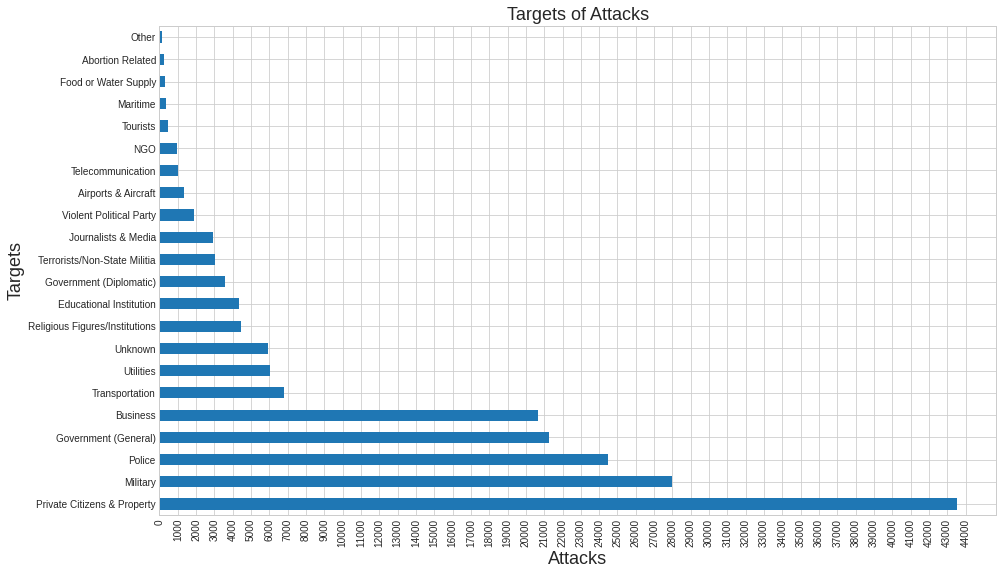

In [ ]:
#Ploting a bar graph to show target groups and the number of attacks on them
plt.figure(figsize=(15,9))
attackTarget_global.plot(kind='barh')
plt.title("Targets of Attacks",fontsize=18)
plt.xlabel('Attacks',fontsize=18)
plt.ylabel('Targets',fontsize=18)
plt.xticks(np.arange(0,45000,1000))
plt.xticks(rotation=90)
plt.show()

##South Asia

In [ ]:
#Printing the Data Frame for South Asia
southAsia_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
585,1970,Pakistan,Sindh,Karachi,South Asia,Assassination,Government (Diplomatic),Unknown,Unknown,Vehicle (not to include vehicle-borne explosiv...,4.0,0.0,20.0,0.0,Unknown,0.0
1186,1972,India,Delhi,New Delhi,South Asia,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,5000000.0
1863,1973,Afghanistan,Kabul,Kabul,South Asia,Unknown,Airports & Aircraft,Black December,Unknown,Unknown,0.0,0.0,1.0,0.0,Unknown,0.0
2217,1974,Pakistan,Sindh,Karachi,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
2705,1974,Pakistan,North-West Frontier Province,Peshawar,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.0,0.0,2.0,0.0,Minor (likely < $1 million),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181676,2017,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181683,2017,Afghanistan,Faryab,Kohistan district,South Asia,Armed Assault,Terrorists/Non-State Militia,Taliban,"The specific motive is unknown; however, sourc...",Firearms,6.0,0.0,0.0,0.0,Unknown,0.0
181684,2017,India,Assam,Hungrum,South Asia,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
181685,2017,Afghanistan,Faryab,Maymana,South Asia,Bombing/Explosion,Business,Unknown,Unknown,Explosives,0.0,0.0,4.0,0.0,Minor (likely < $1 million),0.0


In [ ]:
# Getting basic information about 'South Asia' Data Frame
southAsia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44974 entries, 585 to 181689
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 44974 non-null  int64  
 1   Country              44974 non-null  object 
 2   State                44974 non-null  object 
 3   City                 44974 non-null  object 
 4   Region               44974 non-null  object 
 5   Attack               44974 non-null  object 
 6   Target               44974 non-null  object 
 7   Group_Name           44974 non-null  object 
 8   Motive               44974 non-null  object 
 9   Weapon               44974 non-null  object 
 10  Death                44974 non-null  float64
 11  Perpetrator_Death    44974 non-null  float64
 12  Wounded              44974 non-null  float64
 13  Perpetrator_Wounded  44974 non-null  float64
 14  Property             44974 non-null  object 
 15  Ransom_Amt           44974 non-nu

### Know the number of Attacks, Deaths, Injuries in South Asian Countries

In [ ]:
#Attacks in different countries in South Asia over the year
southAsia_nations = southAsia_df['Country'].value_counts()
southAsia_nations.sort_values(ascending=False, inplace=True)
southAsia_nations

Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: Country, dtype: int64

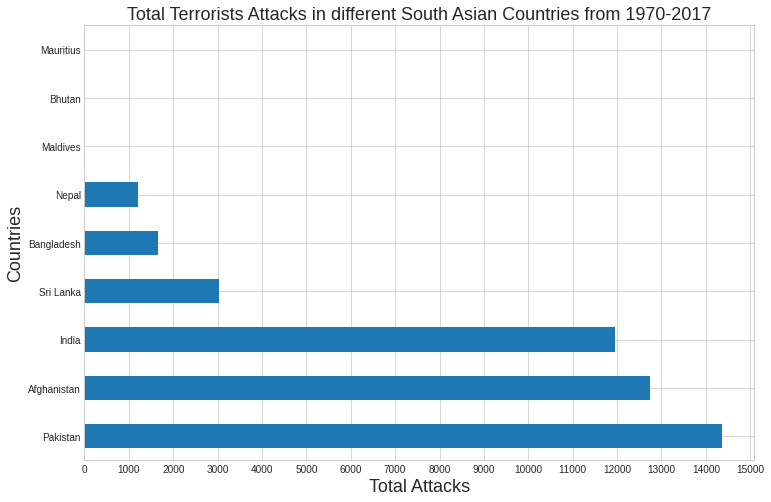

In [ ]:
# Horizontal Bar Graph to show attacks in different South Asian nations over the year
plt.figure(figsize=(12,8))
plt.title("Total Terrorists Attacks in different South Asian Countries from 1970-2017",fontsize=18)
plt.ylabel('Countries',fontsize=18)
plt.xlabel('Total Attacks',fontsize=18)
plt.xticks(np.arange(0,20000,1000))
southAsia_nations.plot(kind='barh')
plt.show()

In [ ]:
#Creating a dataframe to show the countries along with attacks, death, perpeterator_death, wounded and perpetrator_wounded in different countries in South Asia.
sAsia_attack_stat = southAsia_df.groupby('Country')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
southAsia_nations.sort_index(inplace=True)
southAsia_nations

Afghanistan    12731
Bangladesh      1648
Bhutan             6
India          11960
Maldives          22
Mauritius          2
Nepal           1215
Pakistan       14368
Sri Lanka       3022
Name: Country, dtype: int64

In [ ]:
sAsia_attack_stat

,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Country,,,,
Afghanistan,39384.0,15450.0,44277.0,7119.0
Bangladesh,1244.0,93.0,8225.0,46.0
Bhutan,9.0,0.0,5.0,0.0
India,19341.0,933.0,28980.0,189.0
Maldives,20.0,0.0,122.0,1.0
Mauritius,0.0,0.0,1.0,0.0
Nepal,1969.0,712.0,2151.0,230.0
Pakistan,23822.0,2995.0,42038.0,499.0
Sri Lanka,15530.0,1159.0,15561.0,77.0


In [ ]:
frames = [southAsia_nations, sAsia_attack_stat]

In [ ]:
sA_incident_df = pd.concat(frames, axis=1).astype(int)

In [ ]:
sA_incident_df

,Country,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Country,,,,,
Afghanistan,12731,39384,15450,44277,7119
Bangladesh,1648,1244,93,8225,46
Bhutan,6,9,0,5,0
India,11960,19341,933,28980,189
Maldives,22,20,0,122,1
Mauritius,2,0,0,1,0
Nepal,1215,1969,712,2151,230
Pakistan,14368,23822,2995,42038,499
Sri Lanka,3022,15530,1159,15561,77


In [ ]:
sA_incident_df.rename(columns = {"Country":"Attacks"}, inplace=True)
sA_incident_df.loc['Total'] = sA_incident_df.sum(numeric_only=True, axis=0)
sA_incident_df.sort_values(by='Attacks', ascending=False)

,Attacks,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Country,,,,,
Total,44974,101319,21342,141360,8161
Pakistan,14368,23822,2995,42038,499
Afghanistan,12731,39384,15450,44277,7119
India,11960,19341,933,28980,189
Sri Lanka,3022,15530,1159,15561,77
Bangladesh,1648,1244,93,8225,46
Nepal,1215,1969,712,2151,230
Maldives,22,20,0,122,1
Bhutan,6,9,0,5,0


### The Legacy: Exploring the terrorist attacks in India, Pakistan and Afghanistan

#### India

In [ ]:
# Creating a Data Frame for India
ind_df = gt_df.loc[gt_df['Country']=='India']

In [ ]:
ind_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
1186,1972,India,Delhi,New Delhi,South Asia,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,5000000.0
2764,1975,India,Bihar,Samastipur,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,0.0,0.0,Unknown,0.0
3857,1976,India,Delhi,New Delhi,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
5327,1977,India,Maharashtra,Bombay,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,6000000.0
7337,1979,India,Assam,Unknown,South Asia,Armed Assault,Police,Naga People,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,India,Kerala,Koothuparamba,South Asia,Bombing/Explosion,Police,Unknown,"The specific motive is unknown; however, sourc...",Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
181665,2017,India,Chhattisgarh,Toylanka,South Asia,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),"The specific motive is unknown; however, sourc...",Firearms,0.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181672,2017,India,Jammu and Kashmir,Lethapora,South Asia,Armed Assault,Police,Jaish-e-Mohammad (JeM),"The specific motive is unknown; however, sourc...",Explosives,8.0,3.0,3.0,0.0,Unknown,0.0
181684,2017,India,Assam,Hungrum,South Asia,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0


In [ ]:
#Creating a series to know the number of attacks in India over the years
ind_attack = ind_df['Country'].value_counts()
ind_attack_years = ind_df['Year'].value_counts()
ind_attack_years.sort_index(inplace=True)
ind_attack_years

1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: Year, dtype: int64

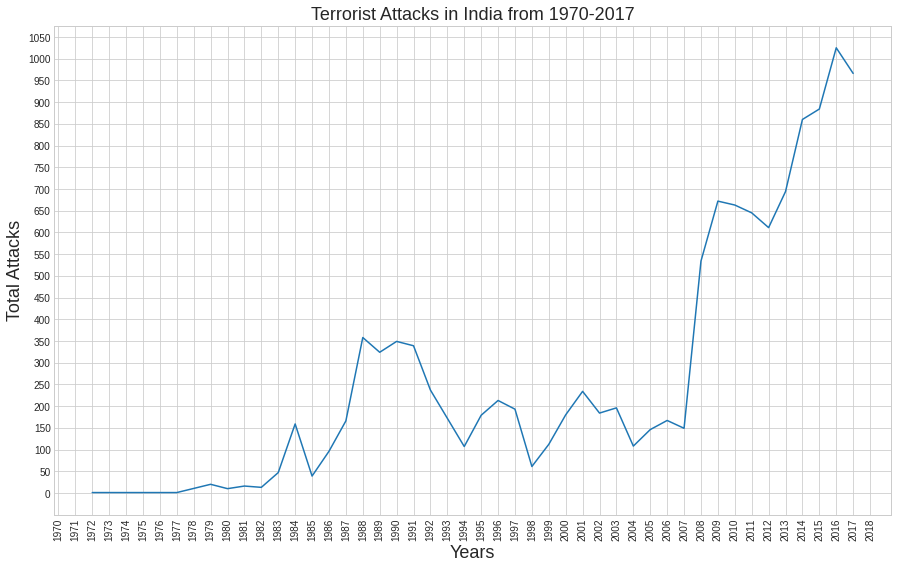

In [ ]:
#Plotting a line graph to get the information about the number of attacks in India over the year
plt.figure(figsize=(15,9))
plt.plot(ind_attack_years)
plt.title("Terrorist Attacks in India from 1970-2017", fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total Attacks',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,1100,50))

plt.xticks(rotation=90)
plt.show()

#### Pakistan

In [ ]:
# Creating a DataFrame for Pakistan
pak_df = gt_df.loc[gt_df['Country']=='Pakistan']

In [ ]:
# Plotting the Data Frame of Pakistan
pak_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
585,1970,Pakistan,Sindh,Karachi,South Asia,Assassination,Government (Diplomatic),Unknown,Unknown,Vehicle (not to include vehicle-borne explosiv...,4.0,0.0,20.0,0.0,Unknown,0.0
2217,1974,Pakistan,Sindh,Karachi,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
2705,1974,Pakistan,North-West Frontier Province,Peshawar,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.0,0.0,2.0,0.0,Minor (likely < $1 million),0.0
2744,1975,Pakistan,Punjab,Rawalpindi,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
2795,1975,Pakistan,North-West Frontier Province,Peshawar,South Asia,Assassination,Government (General),National Awami Party,Unknown,Firearms,1.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181598,2017,Pakistan,Balochistan,Jalal,South Asia,Bombing/Explosion,Utilities,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
181599,2017,Pakistan,Balochistan,Kohlu,South Asia,Bombing/Explosion,Educational Institution,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181608,2017,Pakistan,Punjab,Rawalpindi,South Asia,Armed Assault,Police,Unknown,Unknown,Firearms,1.0,0.0,2.0,0.0,Unknown,0.0
181627,2017,Pakistan,Balochistan,Dera Bugti,South Asia,Bombing/Explosion,Religious Figures/Institutions,Unknown,Unknown,Explosives,1.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0


In [ ]:
# Creating a Series to know the number of attacks in Pakistan over the year
pak_attack = pak_df['Country'].value_counts()
pak_attack_years = pak_df['Year'].value_counts()
pak_attack_years.sort_index(inplace=True)
pak_attack_years

1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013    2215
2014    2151
2015    1243
2016     864
2017     719
Name: Year, dtype: int64

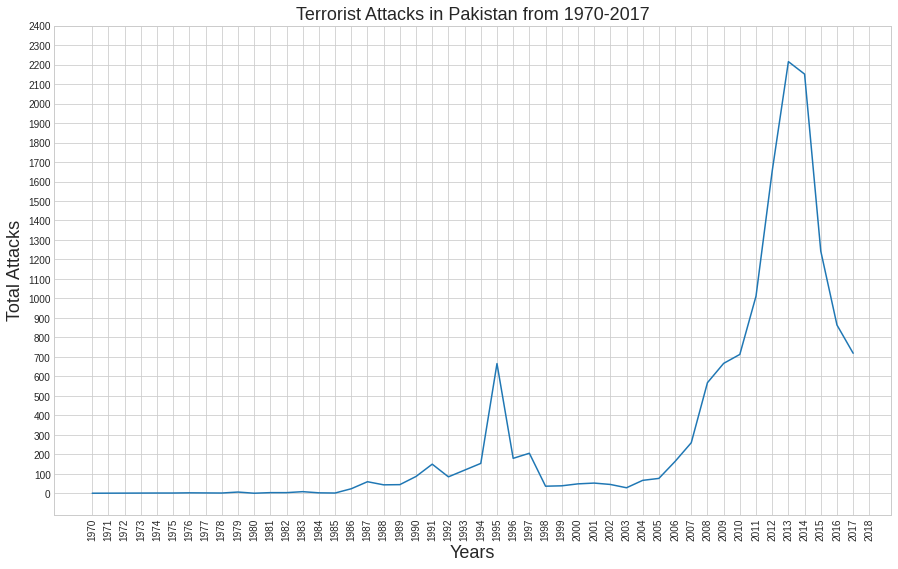

In [ ]:
#Plotting a line graph to get the information about the number of attacks in Pakistan over the year
plt.figure(figsize=(15,9))
plt.plot(pak_attack_years)
plt.title("Terrorist Attacks in Pakistan from 1970-2017",fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total Attacks',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2500,100))

plt.xticks(rotation=90)
plt.show()

#### Afghanistan

In [ ]:
#Creating a Data Frame for Afghanista
afg_df = gt_df.loc[gt_df['Country']=='Afghanistan']

In [ ]:
# Plotting the Data Frame of Afghanistan
afg_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
1863,1973,Afghanistan,Kabul,Kabul,South Asia,Unknown,Airports & Aircraft,Black December,Unknown,Unknown,0.0,0.0,1.0,0.0,Unknown,0.0
7627,1979,Afghanistan,Kabul,Kabul,South Asia,Hostage Taking (Kidnapping),Government (Diplomatic),Shia Muslim extremists,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,0.0
9156,1979,Afghanistan,Ghazni,Ghazni,South Asia,Bombing/Explosion,Transportation,Muslim Guerrillas,Unknown,Explosives,50.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
9218,1979,Afghanistan,Herat,Herat,South Asia,Armed Assault,Tourists,Muslim Guerrillas,Unknown,Firearms,2.0,0.0,1.0,0.0,Unknown,0.0
31132,1987,Afghanistan,Unknown,Unknown,South Asia,Unarmed Assault,Private Citizens & Property,Afghan Mujahideen,Unknown,Chemical,0.0,0.0,2.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181651,2017,Afghanistan,Uruzgan,Khas Uruzgan district,South Asia,Unknown,Military,Taliban,Unknown,Unknown,11.0,10.0,15.0,8.0,Unknown,0.0
181673,2017,Afghanistan,Nangarhar,Jalalabad,South Asia,Bombing/Explosion,Private Citizens & Property,Khorasan Chapter of the Islamic State,Unknown,Explosives,18.0,0.0,14.0,0.0,Unknown,0.0
181676,2017,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181683,2017,Afghanistan,Faryab,Kohistan district,South Asia,Armed Assault,Terrorists/Non-State Militia,Taliban,"The specific motive is unknown; however, sourc...",Firearms,6.0,0.0,0.0,0.0,Unknown,0.0


In [ ]:
#Creating a Series to know the number of attacks in Afghanistan over the years
afg_attack = afg_df['Country'].value_counts()
afg_attack_years = afg_df['Year'].value_counts()
afg_attack_years.sort_index(inplace=True)
afg_attack_years

1973       1
1979       3
1987       1
1988      11
1989      10
1990       2
1991      30
1992      36
1994       9
1995       6
1996       4
1997       1
1998       1
1999       9
2000      14
2001      14
2002      38
2003     100
2004      88
2005     155
2006     282
2007     341
2008     414
2009     503
2010     542
2011     421
2012    1469
2013    1443
2014    1824
2015    1928
2016    1617
2017    1414
Name: Year, dtype: int64

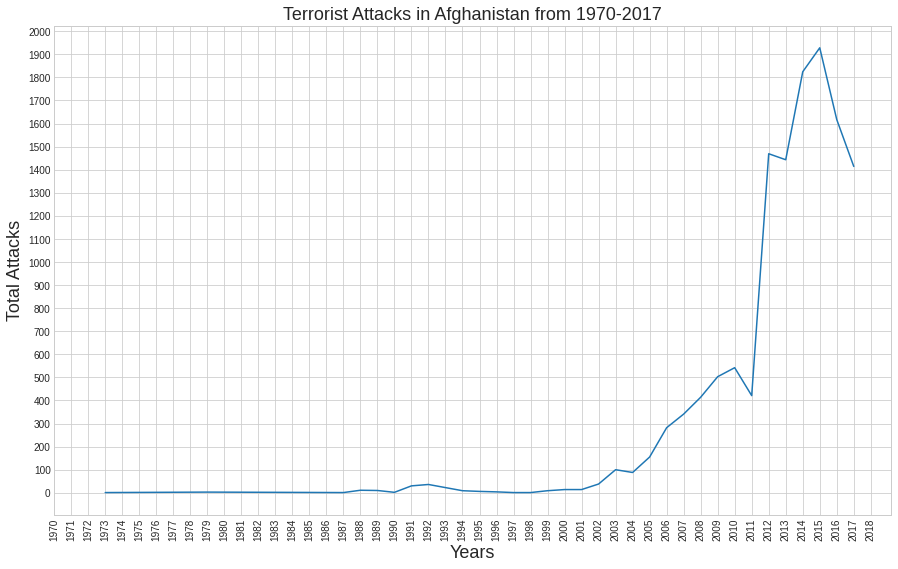

In [ ]:
#Plotting a line graph to get the information about the number of attacks in Afghanistan over the year
plt.figure(figsize=(15,9))
plt.plot(afg_attack_years)
plt.title("Terrorist Attacks in Afghanistan from 1970-2017",fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total Attacks',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2100,100))

plt.xticks(rotation=90)
plt.show()

#### India, Pakistan, Afghanistan: Terrorist attack Data Frame

In [ ]:
# Creating a combined Data Frame for India, Pakistan and Afghanistan
ind_attack_years_renamed = ind_attack_years.rename(index='Attacks_in_India')
pak_attack_years_renamed = pak_attack_years.rename(index='Attacks_in_Pakistan')
afg_attack_years_renamed = afg_attack_years.rename(index='Attaks_in_Afghanistan')

ind_pak_afg_df = pd.concat([ind_attack_years_renamed, pak_attack_years_renamed, afg_attack_years_renamed], axis=1)

In [ ]:
# Filling the NaN values from the "ind_pak_afg_df"
ind_pak_afg_df['Attacks_in_India'].fillna(0, inplace=True)
ind_pak_afg_df['Attacks_in_Pakistan'].fillna(0, inplace=True)
ind_pak_afg_df['Attaks_in_Afghanistan'].fillna(0, inplace=True)

In [ ]:
# Converting the 'Float' datatype of DataFrame into 'int' datatype
ind_pak_afg_df = ind_pak_afg_df.astype(int)

In [ ]:
ind_pak_afg_df

,Attacks_in_India,Attacks_in_Pakistan,Attaks_in_Afghanistan
1970,0,1,0
1972,1,0,0
1973,0,0,1
1974,0,2,0
1975,1,2,0
1976,1,3,0
1977,1,0,0
1978,0,2,0
1979,20,7,3
1980,10,1,0


[]

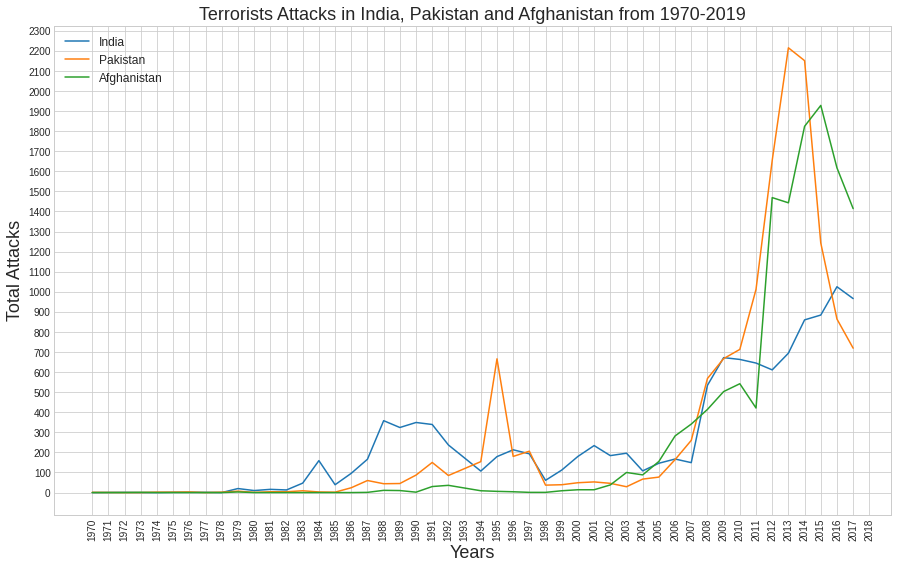

In [ ]:
# Plotting the graph for the attacks in India, Pakistan and Afghanistan over the year
plt.figure(figsize=(15,9))

plt.plot(ind_pak_afg_df)
plt.legend(['India','Pakistan','Afghanistan'],fontsize=12)

plt.title("Terrorists Attacks in India, Pakistan and Afghanistan from 1970-2019",fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total Attacks',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2500,100))
plt.plot()

#### Ploting a "Stack Plot" for attacks in India, Pakistan and Afghanistan


In [ ]:
#Getting all the required lists
x_label = list(ind_pak_afg_df.index)
ind_list = list(ind_pak_afg_df['Attacks_in_India'])
pak_list = list(ind_pak_afg_df['Attacks_in_Pakistan'])
afg_list = list(ind_pak_afg_df['Attaks_in_Afghanistan'])

[]

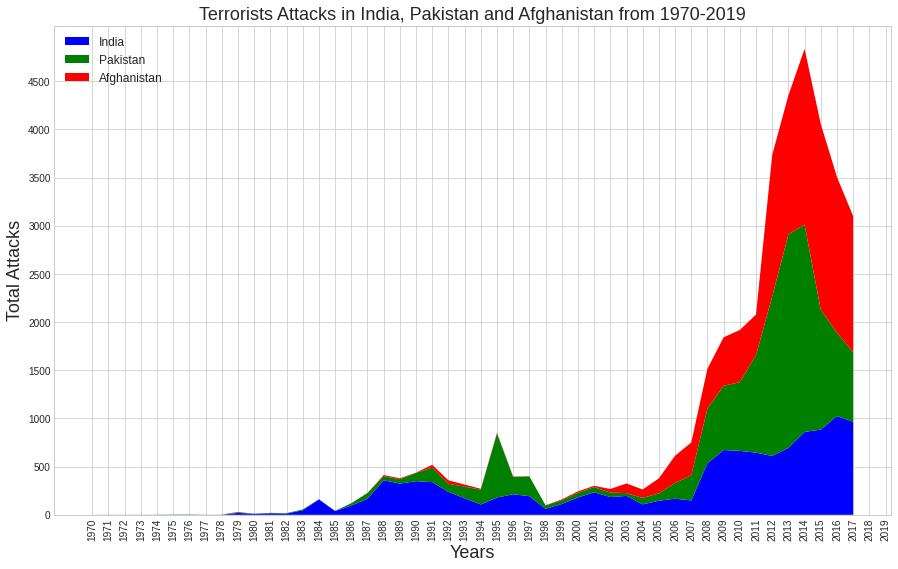

In [ ]:
# Stack Plot for attacks
plt.figure(figsize=(15,9))
labels = ['India', 'Pakistan', 'Afghanistan']
colors = ['b','g','r']
plt.stackplot(x_label, ind_list, pak_list, afg_list, labels = labels, colors = colors)
plt.legend(loc='upper left',fontsize=12)

plt.title("Terrorists Attacks in India, Pakistan and Afghanistan from 1970-2019",fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total Attacks',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2020,1))
plt.yticks(np.arange(0,5000,500))
plt.plot()

##### Remarks:
1. Terrorism is in India, Pakistan and Afghanistan appears to be connected. The fall and rise in terrorism actitivies in these countries are following nearly the same pattern.
2. As per the dataset this region (India, Pakistan and Afghanistan) was relatively safer earlier but in last 2 decades it became the most violent hostile geography.
3. There are several instances when attacks in one country from (India, Pakistan and Afghanistan) were higher compaire to other two e.g. from 1982 to the mid of 1993 and 1998 to 2004 terrorist activities in India were higher, from 1994 to 1996 and from 2009 to 2013 terrorist activities in Pakistan were higher. Similary, in case of Afghanistan we can say that was relatively a quite place as compare to India and Afghanistan from 1970 to 2001 but after 2001 there is sudden rise in terrorist activities surpassing both the other countries in terms of number of terrorist attacks in mid of 2014 till 2017(last record).

### Comparing attacks in India with other countries in South Asia (combined excluding India) and finding when the attacks in India outnumbered the attacks in other countries of South Asia (the wave of terrorism in India).

In [ ]:
# South Asian DataFrame exluding India
sAsia_notInd_df = southAsia_df[southAsia_df['Country']!='India']

In [ ]:
# This Data Frame consists all countries in South Asia except India
sAsia_notInd_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
585,1970,Pakistan,Sindh,Karachi,South Asia,Assassination,Government (Diplomatic),Unknown,Unknown,Vehicle (not to include vehicle-borne explosiv...,4.0,0.0,20.0,0.0,Unknown,0.0
1863,1973,Afghanistan,Kabul,Kabul,South Asia,Unknown,Airports & Aircraft,Black December,Unknown,Unknown,0.0,0.0,1.0,0.0,Unknown,0.0
2217,1974,Pakistan,Sindh,Karachi,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
2705,1974,Pakistan,North-West Frontier Province,Peshawar,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.0,0.0,2.0,0.0,Minor (likely < $1 million),0.0
2744,1975,Pakistan,Punjab,Rawalpindi,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181651,2017,Afghanistan,Uruzgan,Khas Uruzgan district,South Asia,Unknown,Military,Taliban,Unknown,Unknown,11.0,10.0,15.0,8.0,Unknown,0.0
181673,2017,Afghanistan,Nangarhar,Jalalabad,South Asia,Bombing/Explosion,Private Citizens & Property,Khorasan Chapter of the Islamic State,Unknown,Explosives,18.0,0.0,14.0,0.0,Unknown,0.0
181676,2017,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181683,2017,Afghanistan,Faryab,Kohistan district,South Asia,Armed Assault,Terrorists/Non-State Militia,Taliban,"The specific motive is unknown; however, sourc...",Firearms,6.0,0.0,0.0,0.0,Unknown,0.0


In [ ]:
# Attacks in South Asia (exluding India) over the years
sAsia_notInd_attackYrs = sAsia_notInd_df['Year'].value_counts()
sAsia_notInd_attackYrs.sort_index(inplace=True)
sAsia_notInd_attackYrs

1970       1
1973       1
1974       2
1975       3
1976       3
1977       1
1978       2
1979      14
1980       2
1981       7
1982       7
1983      16
1984      85
1985     122
1986     177
1987     182
1988     443
1989     602
1990     252
1991     338
1992     308
1994     269
1995     872
1996     526
1997     297
1998      75
1999     113
2000     177
2001     151
2002     150
2003     157
2004     261
2005     458
2006     771
2007     833
2008    1225
2009    1273
2010    1318
2011    1493
2012    3192
2013    3918
2014    4138
2015    3701
2016    2614
2017    2464
Name: Year, dtype: int64

In [933]:
len(southAsia_attacks.keys())

46

[]

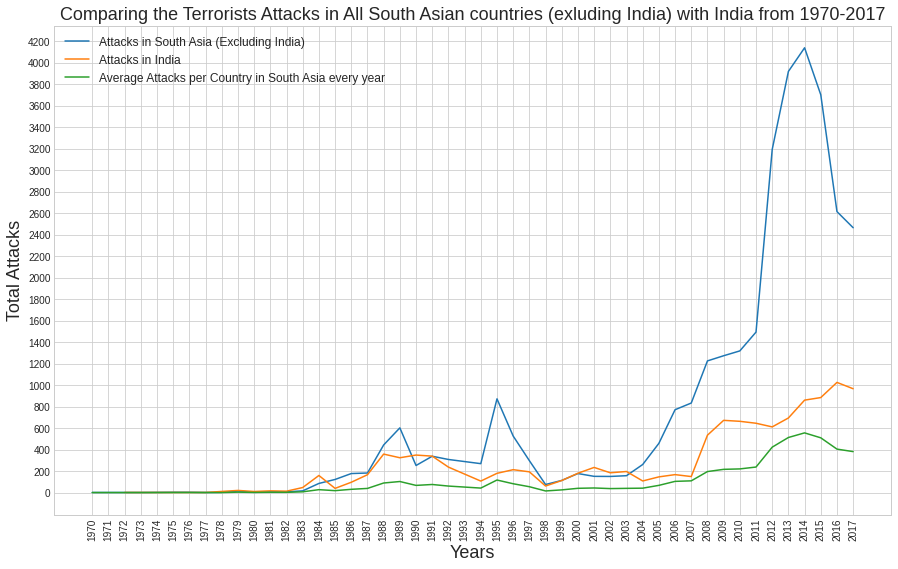

In [936]:
# Plotting a Graph to compare the attacks in India and rest of other countries in South Asia (exluding India) over the years
plt.figure(figsize=(15,9))

plt.plot(sAsia_notInd_attackYrs)
plt.plot(ind_attack_years)
plt.plot(southAsia_attacks/9) #To show the average attacks every country facing every year. There are 9 countries in South Asia.

plt.legend(['Attacks in South Asia (Excluding India)','Attacks in India','Average Attacks per Country in South Asia every year'],fontsize = 12)

plt.title("Comparing the Terrorists Attacks in All South Asian countries (exluding India) with India from 1970-2017",fontsize = 18)
plt.xlabel('Years',fontsize = 18)
plt.ylabel('Total Attacks',fontsize = 18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,5000,200))
plt.plot()

#### From the above graph we can conclude that there are several instances when the number of attacks in India were more compare to the attacks in all other countries in South Asia combined. So we can say that in those year India was the biggest victim of terrorism.

#### Finding years when attacks in India were more compare to other South Asian Countries combined.

In [ ]:
# Renaming the series Index for attacks in South Asia (exluding India) over the years.
sAsia_notInd_attackYrs.rename(index='Attacks_in_SouthAsia_exluding_India', inplace=True)


1970       1
1973       1
1974       2
1975       3
1976       3
1977       1
1978       2
1979      14
1980       2
1981       7
1982       7
1983      16
1984      85
1985     122
1986     177
1987     182
1988     443
1989     602
1990     252
1991     338
1992     308
1994     269
1995     872
1996     526
1997     297
1998      75
1999     113
2000     177
2001     151
2002     150
2003     157
2004     261
2005     458
2006     771
2007     833
2008    1225
2009    1273
2010    1318
2011    1493
2012    3192
2013    3918
2014    4138
2015    3701
2016    2614
2017    2464
Name: Attacks_in_SouthAsia_exluding_India, dtype: int64

In [ ]:
#Renaming the series Index for attacks in India over the years
ind_attack_years.rename(index='Attacks_in_India', inplace=True)

1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: Attacks_in_India, dtype: int64

In [ ]:
compare_attacks_df = pd.concat([ind_attack_years, sAsia_notInd_attackYrs], axis=1)

In [ ]:
compare_attacks_df.columns

Index(['Attacks_in_India', 'Attacks_in_SouthAsia_exluding_India'], dtype='object')

In [ ]:
compare_attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1970 to 2017
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Attacks_in_India                     42 non-null     float64
 1   Attacks_in_SouthAsia_exluding_India  45 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
# Making index the new column named 'Year'
compare_attacks_df.reset_index(inplace=True)
compare_attacks_df = compare_attacks_df.rename(columns={'index':'Year'})

In [ ]:
compare_attacks_df.head()

,Year,Attacks_in_India,Attacks_in_SouthAsia_exluding_India
0,1970,NaN,1.0
1,1972,1.0,NaN
2,1973,NaN,1.0
3,1974,NaN,2.0
4,1975,1.0,3.0


In [ ]:
# Replacing NaN values from the "compare_attacks_df" and changing the datatype from "float" to "int"
compare_attacks_df['Attacks_in_India'].fillna(0, inplace=True)
compare_attacks_df['Attacks_in_SouthAsia_exluding_India'].fillna(0, inplace=True)
compare_attacks_df = compare_attacks_df.astype(int)

In [ ]:
compare_attacks_df

,Year,Attacks_in_India,Attacks_in_SouthAsia_exluding_India
0,1970,0,1
1,1972,1,0
2,1973,0,1
3,1974,0,2
4,1975,1,3
5,1976,1,3
6,1977,1,1
7,1978,0,2
8,1979,20,14
9,1980,10,2


#### Getting a Data Frame to show the years when the number of attacks in India were more compare to the attacks in other South Asian countries combined

In [ ]:
year_ind_more_attacks = compare_attacks_df[(compare_attacks_df['Attacks_in_India']-compare_attacks_df['Attacks_in_SouthAsia_exluding_India'])>0]

In [ ]:
year_ind_more_attacks

,Year,Attacks_in_India,Attacks_in_SouthAsia_exluding_India
1,1972,1,0
8,1979,20,14
9,1980,10,2
10,1981,16,7
11,1982,13,7
12,1983,47,16
13,1984,159,85
19,1990,349,252
20,1991,339,338
28,2000,180,177


In [ ]:
print('In the following years the terrorist attacks in India were more compare to other South Asian Countries combined:', list(year_ind_more_attacks['Year']))

In the following years the terrorist attacks in India were more compare to other South Asian Countries combined: [1972, 1979, 1980, 1981, 1982, 1983, 1984, 1990, 1991, 2000, 2001, 2002, 2003]


### Top 10 Violent Organization in South Asia

In [ ]:
# Total Organizations
sAsia_orgs = southAsia_df['Group_Name'].value_counts()
print(f'According to the data set there are {len(sAsia_orgs)} Organizations in the South Asian Region that persue their goals with the means of violence.')

According to the data set there are 591 Organizations in the South Asian Region that persue their goals with the means of violence.


In [ ]:
sAsia_orgs = sAsia_orgs.reset_index()
sAsia_orgs.rename(columns={'index':'Group_Name', 'Group_Name':'Attacks'})[:20]

,Group_Name,Attacks
0,Unknown,21913
1,Taliban,7477
2,Communist Party of India - Maoist (CPI-Maoist),1878
3,Maoists,1625
4,Liberation Tigers of Tamil Eelam (LTTE),1604
5,Tehrik-i-Taliban Pakistan (TTP),1350
6,Sikh Extremists,712
7,People's Liberation Front (JVP),433
8,United Liberation Front of Assam (ULFA),357
9,Khorasan Chapter of the Islamic State,343


### Taliban 1.0

In [ ]:
# Creating a Data Frame for "Taliban"
taliban_df = gt_df.loc[gt_df['Group_Name']=='Taliban']

In [ ]:
taliban_df

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
59040,1995,Afghanistan,Unknown,Unknown,South Asia,Hostage Taking (Kidnapping),Police,Taliban,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,0.0
60014,1995,Afghanistan,Kandahar,Kandahar,South Asia,Hijacking,Airports & Aircraft,Taliban,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
60462,1995,Afghanistan,Kandahar,Kandahar,South Asia,Hijacking,Airports & Aircraft,Taliban,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
60786,1995,Afghanistan,Kabul,Kabul,South Asia,Bombing/Explosion,Airports & Aircraft,Taliban,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
71682,2001,Afghanistan,Bamyan,Yakawlang,South Asia,Armed Assault,Private Citizens & Property,Taliban,"Specific motive is unknown; however, survivors...",Firearms,150.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,Afghanistan,Nangarhar,Ghani Khel district,South Asia,Unknown,Police,Taliban,Unknown,Unknown,4.0,0.0,0.0,0.0,Unknown,0.0
181619,2017,Afghanistan,Ghazni,Ghazni,South Asia,Unknown,Police,Taliban,Unknown,Unknown,3.0,0.0,1.0,0.0,Unknown,0.0
181651,2017,Afghanistan,Uruzgan,Khas Uruzgan district,South Asia,Unknown,Military,Taliban,Unknown,Unknown,11.0,10.0,15.0,8.0,Unknown,0.0
181676,2017,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0


In [ ]:
# Attack carried out by Taliban in different countries
countriesAttacked_byTaliban = taliban_df['Country'].value_counts()
countriesAttacked_byTaliban

Afghanistan     7423
Pakistan          54
Turkmenistan       1
Name: Country, dtype: int64

In [ ]:
# Getting a percentage for the countries faced Taliban attacks
countriesAttacked_byTaliban_percent = countriesAttacked_byTaliban.apply(lambda x: (x*100/sum(countriesAttacked_byTaliban)))
countriesAttacked_byTaliban_percent

Afghanistan     99.264509
Pakistan         0.722118
Turkmenistan     0.013373
Name: Country, dtype: float64

In [ ]:
# Conlusion of attacks by Taliban
print(f"Out of {sum(countriesAttacked_byTaliban)} attacks carried out by Taliban: \n{countriesAttacked_byTaliban[0]} or {countriesAttacked_byTaliban_percent[0]} percent of attacks were carried out in Afghanistan. ",
      f"\n  {countriesAttacked_byTaliban[1]} or {countriesAttacked_byTaliban_percent[1]} percent of attacks were carried out in Pakistan. ",
      f"\n  {countriesAttacked_byTaliban[2]} or {countriesAttacked_byTaliban_percent[2]} percent of attacks were carried out in Turkmenistan. ")

Out of 7478 attacks carried out by Taliban: 
7423 or 99.26450922706606 percent of attacks were carried out in Afghanistan.  
  54 or 0.7221182134260498 percent of attacks were carried out in Pakistan.  
  1 or 0.013372559507889811 percent of attacks were carried out in Turkmenistan. 


In [ ]:
# Creating a series for attacks by Taliban over the years
talibanAttacks_yrs = taliban_df['Year'].value_counts()
talibanAttacks_yrs.sort_index(inplace=True)

In [ ]:
# Creating a dictonary for the attacks by Taliban over the years
talibanAttacks_yrsDict = talibanAttacks_yrs.to_dict()
print(talibanAttacks_yrsDict)

{1995: 4, 2001: 4, 2002: 7, 2003: 50, 2004: 55, 2005: 120, 2006: 164, 2007: 208, 2008: 258, 2009: 268, 2010: 308, 2011: 214, 2012: 800, 2013: 775, 2014: 1035, 2015: 1249, 2016: 1065, 2017: 894}


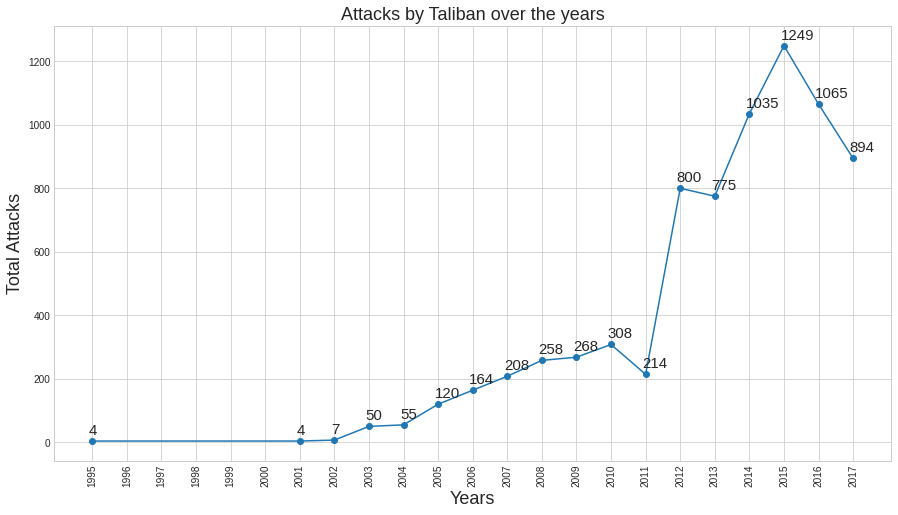

In [ ]:
#Plotting a line graph to show the number of attacks by Taliban over the years
plt.figure(figsize=(15,8))
plt.title("Attacks by Taliban over the years",fontsize = 18)
plt.xlabel('Years',fontsize = 18)
plt.ylabel('Total Attacks',fontsize = 18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1995,2018,1))
plt.plot(talibanAttacks_yrs,marker='o')

for k,v in talibanAttacks_yrsDict.items():
  plt.annotate(v, (k,v),(k-0.1,v+20), size=15)

##### Weapons Used by Taliban

In [ ]:
taliban_df['Weapon'].value_counts()

Explosives                                                                     3180
Firearms                                                                       2655
Unknown                                                                        1299
Incendiary                                                                      207
Melee                                                                           103
Chemical                                                                         23
Other                                                                             5
Sabotage Equipment                                                                4
Radiological                                                                      1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Name: Weapon, dtype: int64

##### Motive of attacks by Taliban 

In [ ]:
taliban_df['Motive'].value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                           5962
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                                                                                     723
The Taliban claimed responsibility for the incident, stating that the attacks on April 5, 2014 were aimed at disrupting the presidential elections.       

##### Target of attacks by Taliban

In [ ]:
taliban_df['Target'].value_counts()

Police                            2535
Military                          1455
Private Citizens & Property       1407
Government (General)               917
Unknown                            244
Business                           227
Educational Institution            145
Transportation                      99
Religious Figures/Institutions      90
NGO                                 80
Terrorists/Non-State Militia        76
Government (Diplomatic)             63
Telecommunication                   35
Airports & Aircraft                 32
Journalists & Media                 26
Utilities                           24
Food or Water Supply                 9
Other                                6
Violent Political Party              5
Tourists                             3
Name: Target, dtype: int64

#### Cost of the damage due to attacks of Taliban

In [ ]:
#Value of damaged property
taliban_df['Property'].value_counts()

Unknown                                          5467
Minor (likely < $1 million)                      2001
Major (likely >= $1 million but < $1 billion)      10
Name: Property, dtype: int64

In [ ]:
# Creating the list of estimated value of property that damaged in attacks 
tablianAttack_cost = list(taliban_df['Property'].value_counts()[1:].keys())
tablianAttack_cost

['Minor (likely < $1 million)',
 'Major (likely >= $1 million but < $1 billion)']

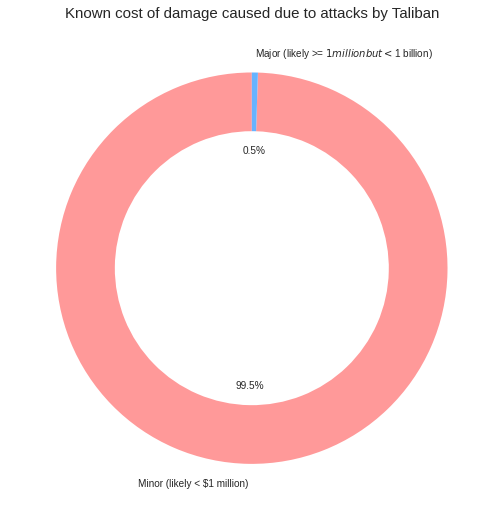

In [ ]:
# Plotting a Donut Graph to show the share of damage to the property caused by attacks
fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(taliban_df['Property'].value_counts()[1:], labels=tablianAttack_cost,autopct='%1.1f%%',
       wedgeprops={'width':0.3}, startangle=90, colors=['#ff9999','#66b3ff'])
ax.set_title('Known cost of damage caused due to attacks by Taliban', fontsize=15)
plt.show()

## India

In [ ]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11960 entries, 1186 to 181689
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11960 non-null  int64  
 1   Country              11960 non-null  object 
 2   State                11960 non-null  object 
 3   City                 11960 non-null  object 
 4   Region               11960 non-null  object 
 5   Attack               11960 non-null  object 
 6   Target               11960 non-null  object 
 7   Group_Name           11960 non-null  object 
 8   Motive               11960 non-null  object 
 9   Weapon               11960 non-null  object 
 10  Death                11960 non-null  float64
 11  Perpetrator_Death    11960 non-null  float64
 12  Wounded              11960 non-null  float64
 13  Perpetrator_Wounded  11960 non-null  float64
 14  Property             11960 non-null  object 
 15  Ransom_Amt           11960 non-n

#### Number of Attacks in different States of India

In [ ]:
# Knowing the number of attacks that happened in different states of India
indStates_attack = ind_df['State'].value_counts()
indStates_attack.sort_index(inplace=True)
indStates_attack

Andhra Pradesh        251
Andhra pradesh         41
Arunachal Pradesh      24
Assam                1151
Bihar                 688
Chandigarh             47
Chhattisgarh          979
Delhi                 208
Goa                     5
Gujarat                85
Haryana                50
Himachal Pradesh       24
Jammu and Kashmir    2454
Jharkhand             887
Karnataka              71
Kerala                 98
Madhya Pradesh         75
Maharashtra           302
Manipur              1100
Meghalaya             294
Mizoram                27
Nagaland              115
Odisha                428
Orissa                221
Puducherry              2
Punjab                949
Rajasthan              43
Sikkim                  4
Tamil Nadu            164
Telangana              24
Tripura               117
Unknown               157
Uttar Pradesh         201
Uttaranchal            24
West Bengal           650
Name: State, dtype: int64

###### The State of Andhra Pradesh comming twice due to spelling difference, we need to merge both

In [ ]:
#Replacing the wrong spelling with the correct one
ind_df.replace("Andhra pradesh", "Andhra Pradesh", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Checking if the state name "Andhra pradesh" with small 'p' is still present
ind_df[ind_df['State']=='Andhra pradesh']

,Year,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt


In [ ]:
# Knowing the number of attacks that happened in different states of India after merging two pieces of data for same state i.e. Andhra Pradesh
indStates_attack = ind_df['State'].value_counts()
indStates_attack.sort_index(inplace=True)
indStates_attack

Andhra Pradesh        292
Arunachal Pradesh      24
Assam                1151
Bihar                 688
Chandigarh             47
Chhattisgarh          979
Delhi                 208
Goa                     5
Gujarat                85
Haryana                50
Himachal Pradesh       24
Jammu and Kashmir    2454
Jharkhand             887
Karnataka              71
Kerala                 98
Madhya Pradesh         75
Maharashtra           302
Manipur              1100
Meghalaya             294
Mizoram                27
Nagaland              115
Odisha                428
Orissa                221
Puducherry              2
Punjab                949
Rajasthan              43
Sikkim                  4
Tamil Nadu            164
Telangana              24
Tripura               117
Unknown               157
Uttar Pradesh         201
Uttaranchal            24
West Bengal           650
Name: State, dtype: int64

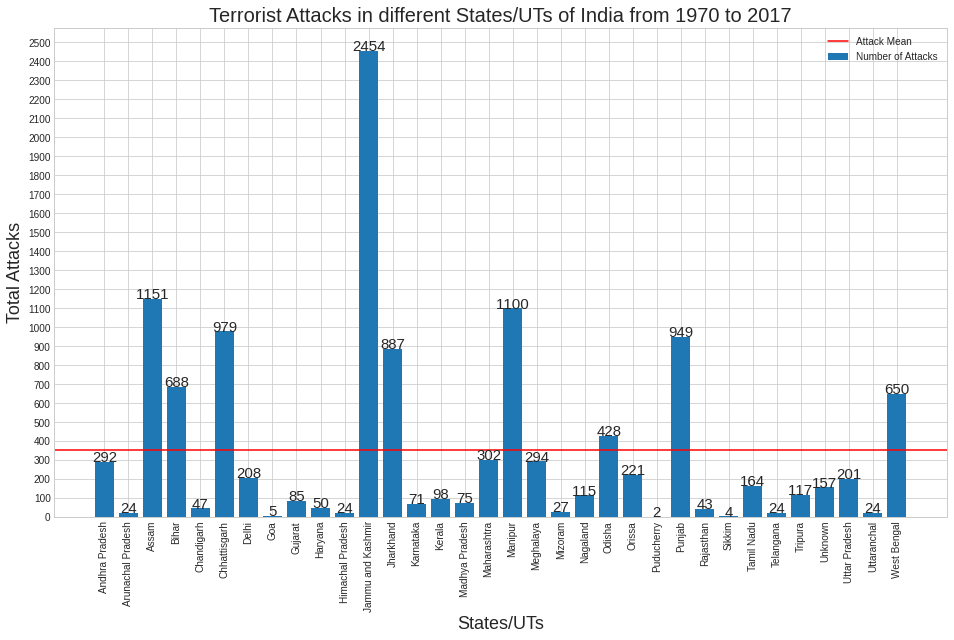

In [ ]:
# Plotting a 'Bar' Graph to compare the attacks in different states of India
def addlabels(indState_list,indStateAttack_list):
  for i in range(len(indState_list)):
    plt.text(i,indStateAttack_list[i],indStateAttack_list[i], ha = 'center',fontsize=15)

if __name__ == '__main__':
  indState_list = list(indStates_attack.keys())
  indStateAttack_list = list(indStates_attack.values)
  plt.figure(figsize=(16,9))
  plt.bar(indState_list, indStateAttack_list)
  addlabels(indState_list,indStateAttack_list)
  plt.title("Terrorist Attacks in different States/UTs of India from 1970 to 2017", fontsize=20)
  plt.xlabel('States/UTs', fontsize=18)
  plt.xticks(rotation=90)
  plt.ylabel('Total Attacks', fontsize=18)
  plt.yticks(np.arange(0,2600,100))
  plt.axhline(y = sum(indStateAttack_list)/len(indStateAttack_list), color = 'r', linestyle = '-') # Giving a mean attack line to show which state/UT has attacks no higher side and which on lower.
  plt.yticks()
  plt.legend(['Attack Mean', 'Number of Attacks'])
  plt.show()

#### Create a table to show which state has faced what percent of attacks in India

In [ ]:
#Creating a series of percentage of attacks happend in every state
indStates_attack_percent = indStates_attack.apply(lambda x: (x*100/sum(indStates_attack)))

In [ ]:
# Renaming the required series
indStates_attack.rename(index='Number_of_Attacks', inplace=True)
indStates_attack_percent.rename(index='Percentage_of_Attacks', inplace=True)

Andhra Pradesh        2.441472
Arunachal Pradesh     0.200669
Assam                 9.623746
Bihar                 5.752508
Chandigarh            0.392977
Chhattisgarh          8.185619
Delhi                 1.739130
Goa                   0.041806
Gujarat               0.710702
Haryana               0.418060
Himachal Pradesh      0.200669
Jammu and Kashmir    20.518395
Jharkhand             7.416388
Karnataka             0.593645
Kerala                0.819398
Madhya Pradesh        0.627090
Maharashtra           2.525084
Manipur               9.197324
Meghalaya             2.458194
Mizoram               0.225753
Nagaland              0.961538
Odisha                3.578595
Orissa                1.847826
Puducherry            0.016722
Punjab                7.934783
Rajasthan             0.359532
Sikkim                0.033445
Tamil Nadu            1.371237
Telangana             0.200669
Tripura               0.978261
Unknown               1.312709
Uttar Pradesh         1.680602
Uttaranc

In [ ]:
indStates_attack_df = pd.concat([indStates_attack,indStates_attack_percent], axis=1)
indStates_attack_df.reset_index(inplace=True)
indStates_attack_df.rename(columns={'index':'State/UT'},inplace=True)
indStates_attack_df.sort_values(by='Percentage_of_Attacks', ascending=False,inplace=True)

In [ ]:
#Printing Top 5 states faced higher number of terrorist attacks
indStates_attack_df.head()

,State/UT,Number_of_Attacks,Percentage_of_Attacks
11,Jammu and Kashmir,2454,20.518395
2,Assam,1151,9.623746
17,Manipur,1100,9.197324
5,Chhattisgarh,979,8.185619
24,Punjab,949,7.934783


In [ ]:
# Creating a required list of percent of attacks that every state encountered for large attacks and combining the rest of attacks into one value for small percentage of attacks
other_attacks = []
a = 0
for i in indStates_attack_percent.sort_values(ascending=False):
  if i>5:
    other_attacks.append(i)
  else:
    a = a + i
other_attacks.append(a)
print(other_attacks)

[20.51839464882943, 9.623745819397993, 9.19732441471572, 8.18561872909699, 7.934782608695652, 7.416387959866221, 5.752508361204013, 5.434782608695652, 25.936454849498325]


In [ ]:
#Creating a list of states that encountered the large number of attacks
other_states = 'Attacks in Other States/UTs'
labels = list(indStates_attack_percent.sort_values(ascending=False)[:len(other_attacks[:-1])].keys())
labels.append(other_states)
print(labels)

['Jammu and Kashmir', 'Assam', 'Manipur', 'Chhattisgarh', 'Punjab', 'Jharkhand', 'Bihar', 'West Bengal', 'Attacks in Other States/UTs']


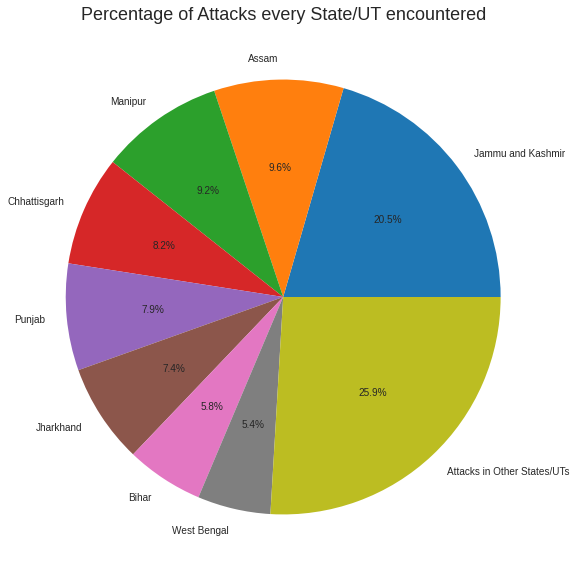

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# target_data = indStates_attack_percent.sort_values(ascending=False).iloc[:8]
# target_list = list(target_data.keys())
ax.pie(other_attacks, labels=labels, autopct='%1.1f%%')
ax.set_title('Percentage of Attacks every State/UT encountered',fontsize = 18)
plt.show()

#### Creating a Data Frame that gives the information about the 'attacks', 'death', 'wounded' in different states/UTs in India over the year.

In [ ]:
ind_casualties_stats = ind_df.groupby('State')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum()
data_list = [indStates_attack, ind_casualties_stats]
ind_stateAttacks_stats = pd.concat(data_list, axis=1).astype(int)
ind_stateAttacks_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Number_of_Attacks,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
State,,,,,
Andhra Pradesh,292,576,31,690,4
Arunachal Pradesh,24,14,6,33,4
Assam,1151,2112,53,3953,9
Bihar,688,765,43,561,0
Chandigarh,47,192,0,141,0
Chhattisgarh,979,1465,213,1053,68
Delhi,208,439,9,2041,0
Goa,5,2,2,1,0
Gujarat,85,159,2,454,0


#### Organization involved in attacks in India.

In [ ]:
# Number of violent Organizations in India
ind_orgs = ind_df['Group_Name'].value_counts()
print(f"There are atleast {len(ind_orgs)} organization in India that are adhere to violence.")

There are atleast 301 organization in India that are adhere to violence.


In [ ]:
#Top 20 violent Organizations (including uknown) in India
ind_org_top20 = ind_orgs[0:20]
ind_org_top20

Unknown                                                         4263
Communist Party of India - Maoist (CPI-Maoist)                  1877
Maoists                                                         1396
Sikh Extremists                                                  710
United Liberation Front of Assam (ULFA)                          357
Hizbul Mujahideen (HM)                                           199
Lashkar-e-Taiba (LeT)                                            187
National Democratic Front of Bodoland (NDFB)                     174
Garo National Liberation Army                                    166
Muslim Separatists                                               118
People's War Group (PWG)                                          97
National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)      89
People's Liberation Army (India)                                  88
Bodo Militants                                                    87
Muslim Militants                  

[]

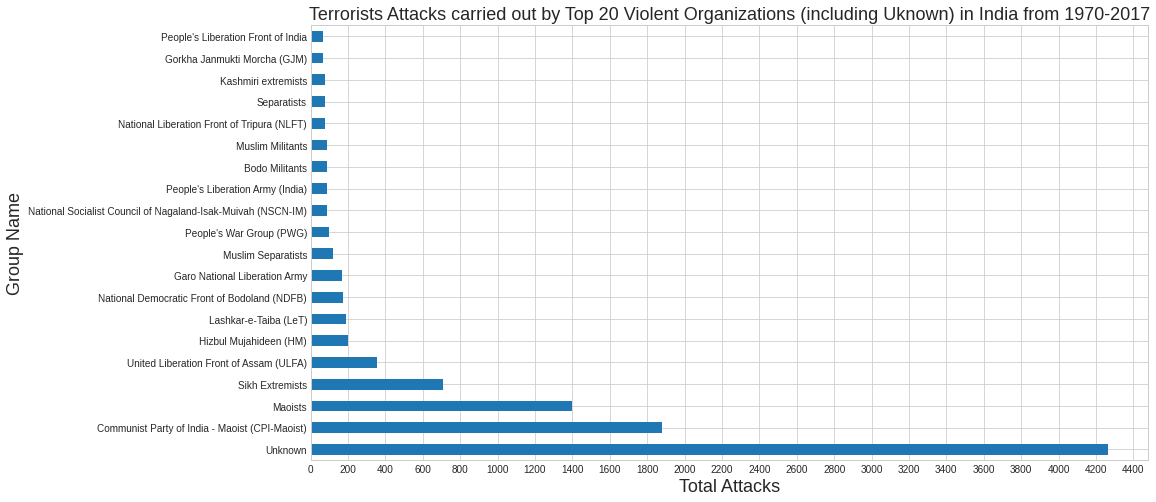

In [ ]:
# Plotting a horizontal Bar Grap to show the number of attacks by top 20 violent Organizations in India
plt.figure(figsize=(15,8))
plt.title("Terrorists Attacks carried out by Top 20 Violent Organizations (including Uknown) in India from 1970-2017",fontsize = 18)
plt.ylabel('Group Name',fontsize = 18)
plt.xlabel('Total Attacks',fontsize = 18)
plt.xticks(np.arange(0,5000,200))
ind_org_top20.plot(kind='barh')
plt.plot()

#### Weapons used in India for attacks.

In [ ]:
# Crating a series to show the kiind of weapons used for attacks
weapon_used_Ind = ind_df['Weapon'].value_counts()
weapon_used_Ind

Explosives                                                                     5030
Firearms                                                                       4530
Incendiary                                                                      930
Unknown                                                                         908
Melee                                                                           502
Sabotage Equipment                                                               32
Chemical                                                                         12
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       7
Other                                                                             7
Fake Weapons                                                                      2
Name: Weapon, dtype: int64

In [ ]:
#Creating a list of number (frequency) of types of attacks that happend in India over the years
weaponIndCount_list = []
a = 0
for wp in weapon_used_Ind.values:
  if wp>900:
    weaponIndCount_list.append(wp)
  else:
    a = a + wp
weaponIndCount_list.append(a)
print(weaponIndCount_list)

[5030, 4530, 930, 908, 562]


In [ ]:
#Creating a list of Weapon/Methods used for attacks in India
lessUsed_weapon = 'Other Weapons Including - Melee, Sabotage Equipment, Chemical, Fake Weapons, etc'
weaponIndName_list = list(weapon_used_Ind.keys()[:4])
weaponIndName_list.append(lessUsed_weapon)
print(weaponIndName_list)

['Explosives', 'Firearms', 'Incendiary', 'Unknown', 'Other Weapons Including - Melee, Sabotage Equipment, Chemical, Fake Weapons, etc']


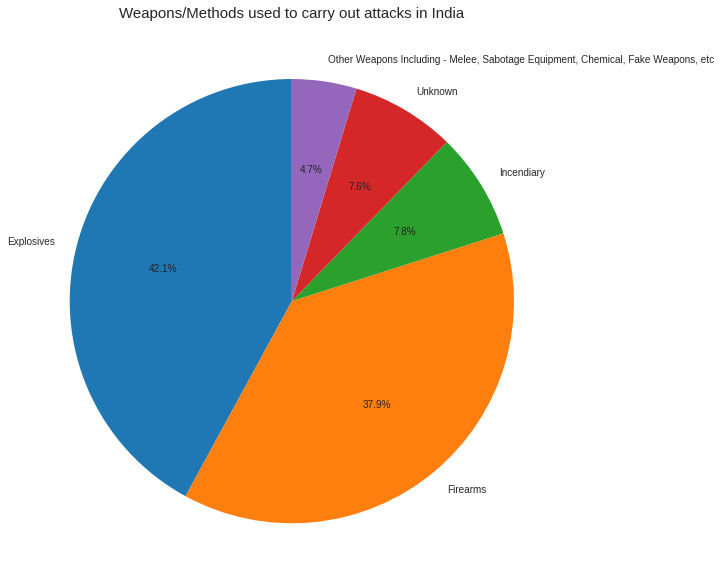

In [ ]:
#Plotting a 'Pie chart' to show the weapons types used and other methods for attack
fig, ax = plt.subplots(figsize=(10,10))
# weapon_data = weapon_used_Ind
# weapon_list = list(weapon_data.keys())
ax.pie(weaponIndCount_list,labels=weaponIndName_list, autopct='%1.1f%%',startangle=90)
ax.set_title('Weapons/Methods used to carry out attacks in India',fontsize = 15)
plt.tight_layout()

#### Who are the targets in India?

In [ ]:
# Who are the primary target of terrorism in India?
target_ind = ind_df['Target'].value_counts()
target_ind

Private Citizens & Property       3144
Police                            2299
Government (General)              1727
Business                          1131
Military                           916
Transportation                     831
Unknown                            598
Educational Institution            297
Violent Political Party            234
Religious Figures/Institutions     214
Terrorists/Non-State Militia       143
Telecommunication                  139
Journalists & Media                 87
Utilities                           86
Tourists                            30
Airports & Aircraft                 28
NGO                                 20
Government (Diplomatic)             19
Food or Water Supply                12
Maritime                             3
Other                                2
Name: Target, dtype: int64

In [ ]:
# Creating a list of number (fequency) of attacks over a specific target in India over the years
indAttackNum_list = []
a = 0
for tar in target_ind.values:
  if tar>200:
    indAttackNum_list.append(tar)
  else:
    a = a + tar
indAttackNum_list.append(a)
print(indAttackNum_list)

[3144, 2299, 1727, 1131, 916, 831, 598, 297, 234, 214, 569]


In [ ]:
# Creating a list of 'Targest' in of attacks in India over the year
other_targets = 'Other Targets including - Non-State Militia, Journalists, NGO, Maritime, Airports, Tourists etc'
indTargetName_list = list(target_ind.keys()[:10])
indTargetName_list.append(other_targets)
print(indTargetName_list)

['Private Citizens & Property', 'Police', 'Government (General)', 'Business', 'Military', 'Transportation', 'Unknown', 'Educational Institution', 'Violent Political Party', 'Religious Figures/Institutions', 'Other Targets including - Non-State Militia, Journalists, NGO, Maritime, Airports, Tourists etc']


In [ ]:
#Creating a Series for the targets of attacks
indAttackTarget_Stat = pd.Series(data=indAttackNum_list,index=indTargetName_list)
indAttackTarget_Stat

Private Citizens & Property                                                                        3144
Police                                                                                             2299
Government (General)                                                                               1727
Business                                                                                           1131
Military                                                                                            916
Transportation                                                                                      831
Unknown                                                                                             598
Educational Institution                                                                             297
Violent Political Party                                                                             234
Religious Figures/Institutions                                  

In [ ]:
#Plotting a 'Pie chart' to show the targets of attacks in India
px.pie(indAttackTarget_Stat, values=indAttackTarget_Stat.values,names=indAttackTarget_Stat.keys(), title="Targets of Terrorist Attacks in India")